In [43]:
import matplotlib.pyplot as plt
import re
import math


In [44]:
LogFile = "/home/hp/out.log"

In [47]:
def parser(line):
  DATE = r'(?P<date>\d{4}\-\d{2}\-\d{2})'
  SPACE = r'\s'
  TIME = r'(?P<time>\d{2}\:\d{2}\:\d{2}\.\d+)'
  PID = r'\[PID\s(?P<pid>\d+)]'
  RESPONSE = r'\[(?P<response>\d+)ms\]'
  UID = r'\[UID\s(?P<uid>.+?)\]'
  LEVEL = r'\[(?P<level>[A-Za-z]+)\]'
  URL = r'(?P<url>/.+?)'
  MESSAGE = r'(?P<message>.+)'
  
  PATTERN = DATE+SPACE+TIME+SPACE+PID+SPACE+RESPONSE+SPACE+UID+SPACE+LEVEL+SPACE+URL+SPACE+MESSAGE
  
  result = re.search(PATTERN,line)
  if result:
    return result.groupdict()
 
   


In [48]:

time_list = []

with open(LogFile) as fh:
  for logLine in fh:
    result = parser(logLine)
    if result:
      if result['level'] == 'ERROR':
        time_list.append(int(result['time'][:2]))  # 15:50:45.846066 [:3] 15
        

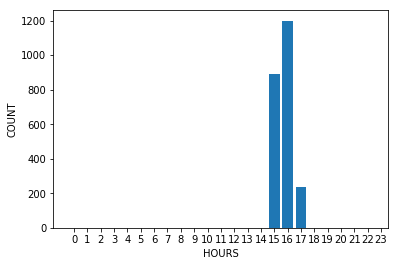

In [49]:
hours = [x for x in range(24) ]
plt.hist(time_list,hours,histtype='bar',rwidth=0.80,align='left')
plt.xlabel('HOURS')
plt.ylabel('COUNT')
plt.xticks(hours)
plt.show()

In [50]:
response_list = []

with open(LogFile) as fh:
  for logLine in fh:
    result = parser(logLine)
    if result:
      if result['level'] != 'ERROR':
        response_list.append(int(result['response']))
response_list.sort()        

In [51]:
def get_percentile(per,lst):
  lst_len = len(lst)
  index = (per/100) * lst_len
  if index.is_integer():
    index = int(index) - 1 
    position1 = lst[index]
    position2 = lst[index+1]
    percentile = ( position1 + position2 ) / 2
    return percentile
  
  else:
    index_round = math.ceil(index)
    index = int(index_round) -1
    percentile = lst[index]
    return percentile

In [40]:
get_percentile(50,response_list)

258

In [10]:
get_percentile(90,response_list)


443

In [11]:
get_percentile(95,response_list)

472